# Understanding the data

This is a datasaet that is publicly available from the IBM Telco Customer Chrun dataset on Kaggle and represets a sample of telecommunication customers

> Each row represents a single customer, and each column contains that customer's attributes.

### Dataset Categories

The dataset includes four main types of information:

* **Churn (Target Variable)**
    * **Churn:** Customers who left within the last month.

* **Customer Services**
    * Phone
    * Multiple lines
    * Internet service
    * Online security
    * Online backup
    * Device protection
    * Tech support
    * Streaming TV
    * Streaming movies

* **Account Information**
    * Tenure (how long they've been a customer)
    * Contract
    * Payment method
    * Paperless billing
    * Monthly charges
    * Total charges

* **Customer Demographics**
    * Gender
    * Age range
    * Partners
    * Dependents

# What is churn?
Churn refers to the number of customers who end their relationship with a company within a given period.

This can come in 2 forms: Voluntary Churn and Involuntary Churn

* **Voluntary Churn**: is when a customer actively decides to leave, often due to dissatisfication, a better offer, or a change in needs

* **Involuntary Churn**: When a customer's subscription is canceled unintentionally, most often due to issues with payment methods, or technical problems

### Why is this important?
High churn rates, can negatively impact revenue and growth, it also highlights the importance of customer retention strategies to keep  and engage customers.

Besides that, understanding why customers churn,businesses can identify areas for improvement in their products, services, or marketing efforts

# Business Problem:

IBM whats to predic which customers are likely to churn in the near future so that retention teams can proactively engage wthem with personalized offers and support

# Key Questions to Exmplore:

1. What proportion of customers have churned?

2. How does churn vary by contract type, payment method, or tenure?

3. Which services are most correlated with churn?

4. Are there specific customer demographics more likely to churn?

5. What insights can guide customer retention strategies?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.make_dataset import load_and_clean_churn_data


In [2]:
df = load_and_clean_churn_data()
df.head()
df.info()
df["Churn"].value_counts(normalize=True)


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

In [3]:
df["Churn"].value_counts(normalize=True)

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

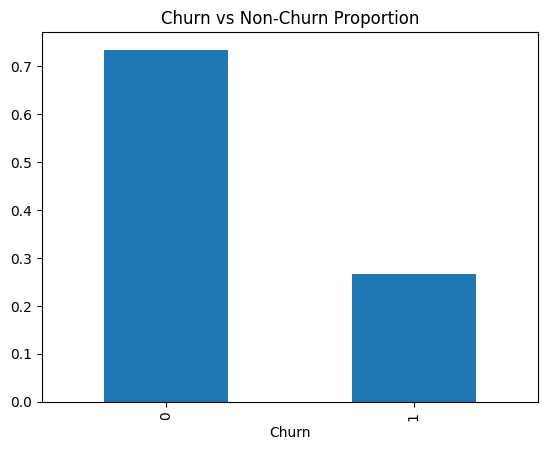

In [4]:
df["Churn"].value_counts(normalize=True).plot(kind="bar")
plt.title("Churn vs Non-Churn Proportion")
plt.show()

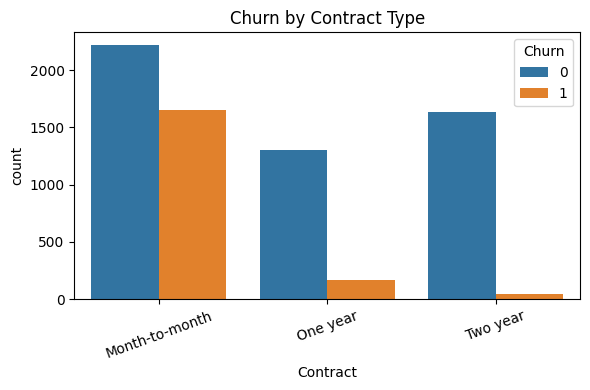

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn by Contract Type")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

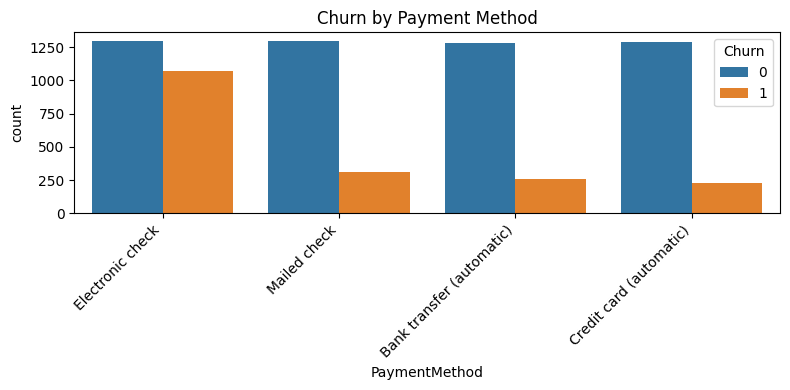

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="PaymentMethod", hue="Churn")
plt.title("Churn by Payment Method")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

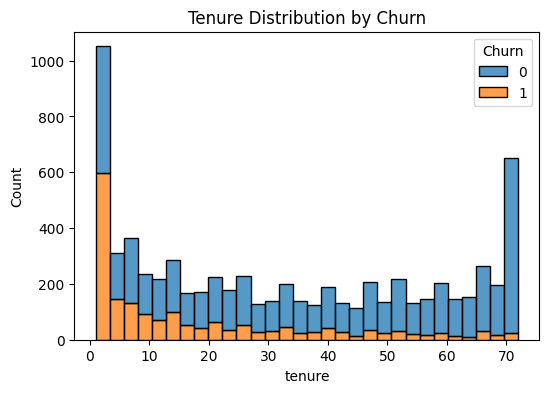

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="tenure", hue="Churn", bins=30, kde=False, multiple="stack")
plt.title("Tenure Distribution by Churn")
plt.show()

In [8]:
service_cols = [
    "PhoneService", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies"
]

for col in service_cols:
    if col in df.columns:
        print(f"\n=== {col} ===")
        print(df.groupby(col)["Churn"].mean())


=== PhoneService ===
PhoneService
No     0.250000
Yes    0.267475
Name: Churn, dtype: float64

=== InternetService ===
InternetService
DSL            0.189983
Fiber optic    0.418928
No             0.074342
Name: Churn, dtype: float64

=== OnlineSecurity ===
OnlineSecurity
No                     0.417787
No internet service    0.074342
Yes                    0.146402
Name: Churn, dtype: float64

=== OnlineBackup ===
OnlineBackup
No                     0.399417
No internet service    0.074342
Yes                    0.215670
Name: Churn, dtype: float64

=== DeviceProtection ===
DeviceProtection
No                     0.391403
No internet service    0.074342
Yes                    0.225393
Name: Churn, dtype: float64

=== TechSupport ===
TechSupport
No                     0.416475
No internet service    0.074342
Yes                    0.151961
Name: Churn, dtype: float64

=== StreamingTV ===
StreamingTV
No                     0.335351
No internet service    0.074342
Yes                  

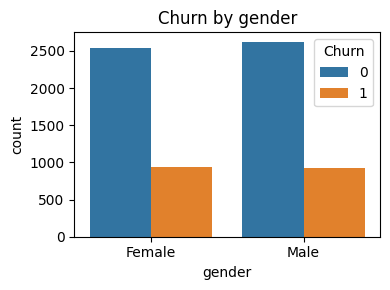

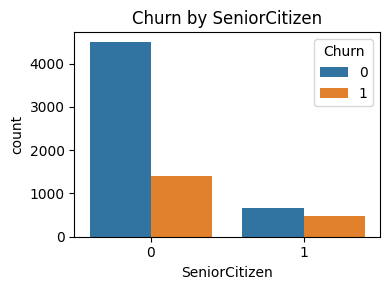

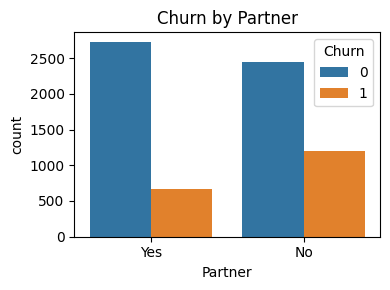

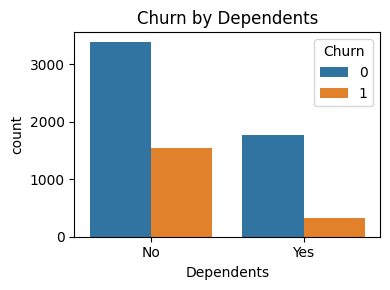

In [9]:
demo_cols = ["gender", "SeniorCitizen", "Partner", "Dependents"]

for col in demo_cols:
    plt.figure(figsize=(4,3))
    sns.countplot(data=df, x=col, hue="Churn")
    plt.title(f"Churn by {col}")
    plt.tight_layout()
    plt.show()

In [13]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [14]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


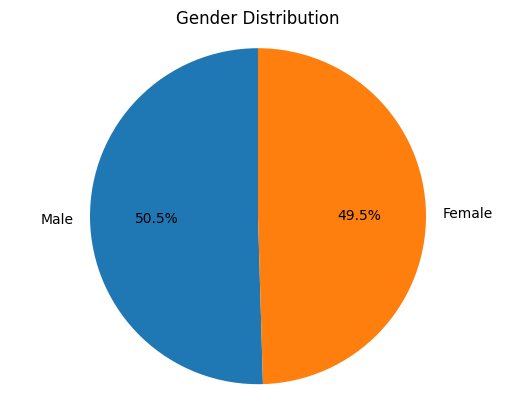

In [15]:
gender_counts = df['gender'].value_counts()

labels = gender_counts.index
sizes = gender_counts.values

plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle=90)

plt.title('Gender Distribution')
plt.axis('equal')

plt.show()

/tmp/ipykernel_8369/632036631.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Churn', palette=['salmon', 'skyblue'])


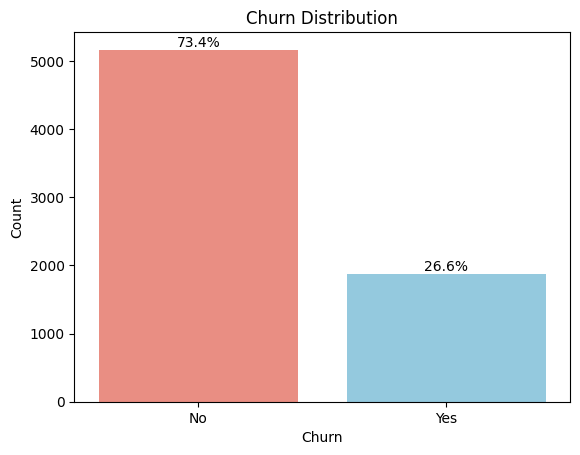

In [16]:
ax = sns.countplot(data = df, x = 'Churn', palette=['salmon', 'skyblue'])

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, p.get_x() + (p.get_width() / 2., p.get_height()),ha='center', va = 'bottom', fontsize=10, color='black')


plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()

/tmp/ipykernel_8369/434055378.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


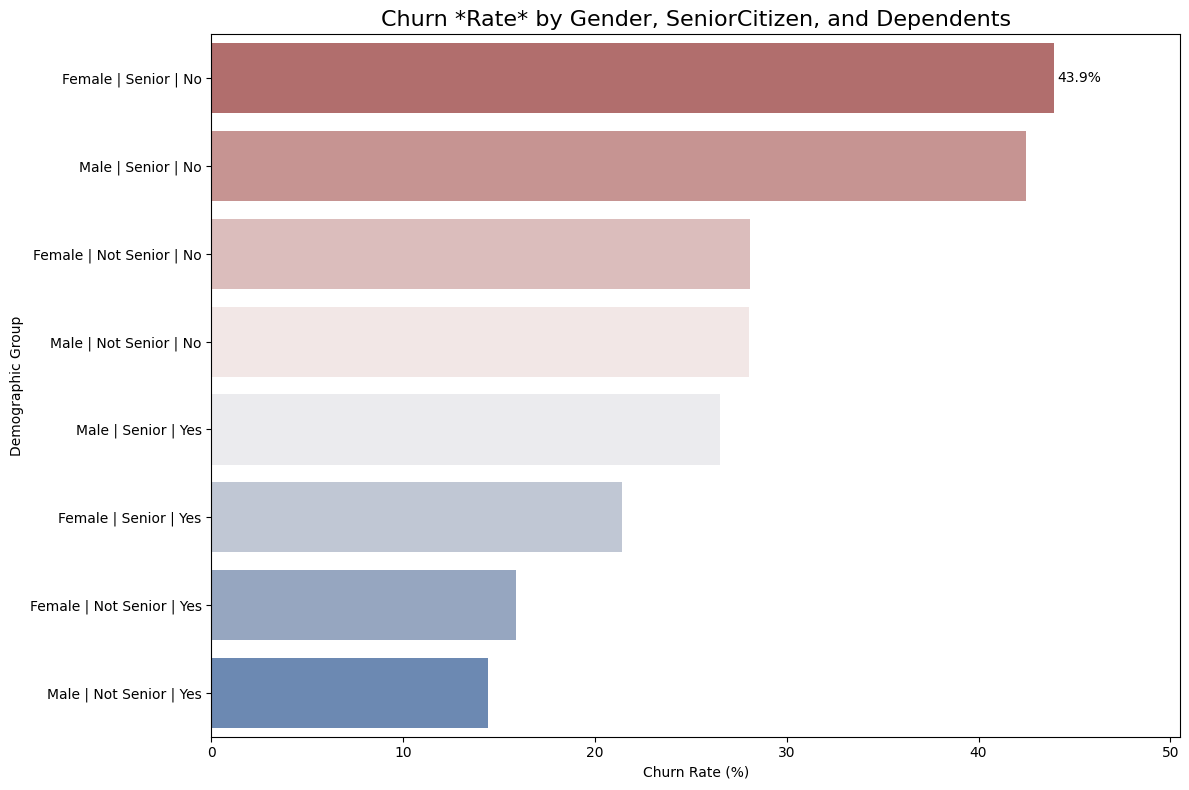

In [17]:
df['Senior'] = df['SeniorCitizen'].map({0: 'Not Senior', 1: 'Senior'})

crosstab = pd.crosstab(
    [df['gender'], df['Senior'], df['Dependents']],
    df['Churn'],
    normalize='index'
) * 100

churn_rate = crosstab[['Yes']].reset_index()

churn_rate['group'] = (
    churn_rate['gender'] + ' | ' + 
    churn_rate['Senior'] + ' | ' + 
    churn_rate['Dependents']
)

churn_rate = churn_rate.sort_values(by='Yes', ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=churn_rate,
    x='Yes',
    y='group',
    palette='vlag_r' 
)

ax.bar_label(ax.containers[0], fmt='%.1f%%', fontsize=10, padding=3)

ax.set_title('Churn *Rate* by Gender, SeniorCitizen, and Dependents', fontsize=16)
ax.set_xlabel('Churn Rate (%)')
ax.set_ylabel('Demographic Group')

ax.set_xlim(0, max(churn_rate['Yes']) * 1.15) 

plt.tight_layout()
plt.show()

With this plot, we cna conclude that the highest Churn rate are shared with Senior citizens without Dependents, and the lowest churn rate is shared between Not senior citizens without Dependents

<Figure size 1400x1000 with 0 Axes>

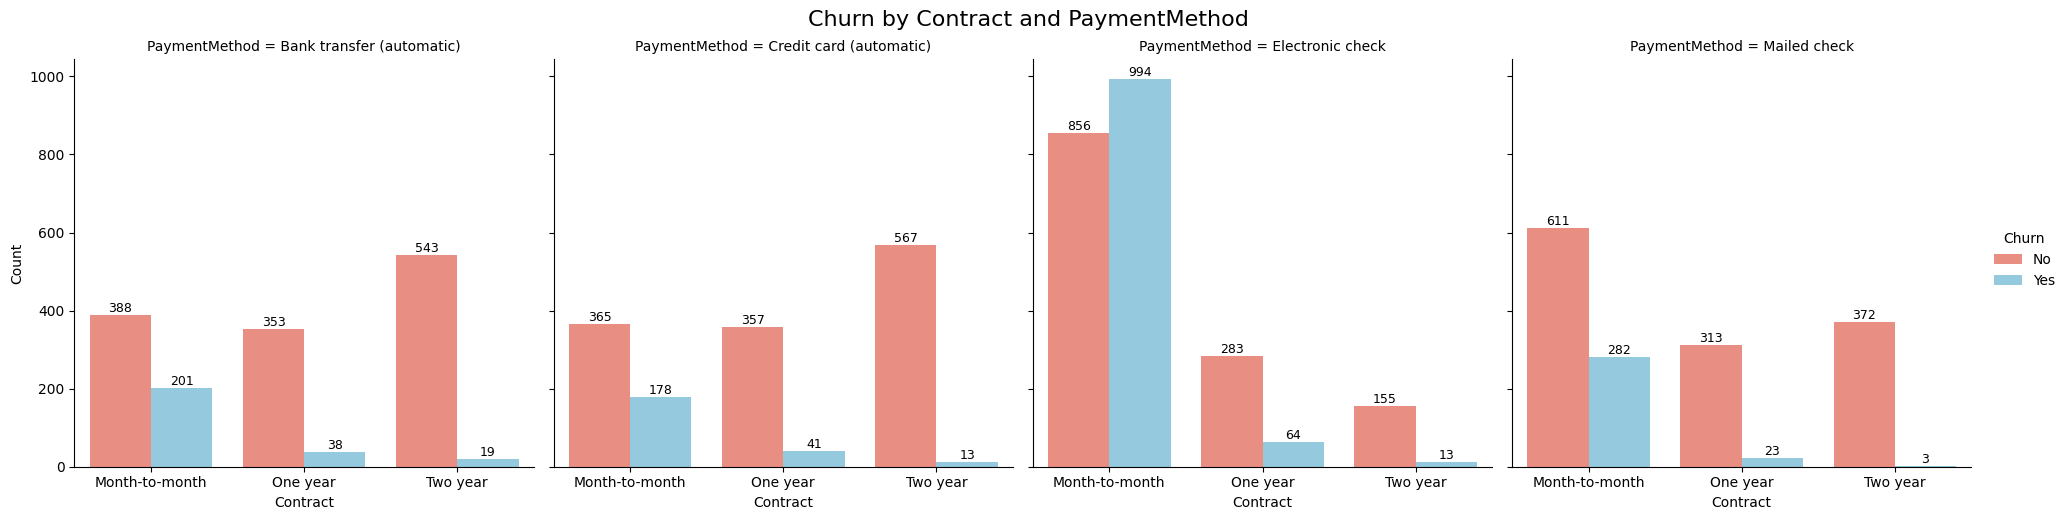

In [18]:
grouped = df.groupby(['Contract', 'PaymentMethod','Churn']).size().reset_index(name='count')

grouped['group'] = (grouped['Contract'] + ' | ' + grouped['PaymentMethod'].astype(str))

plt.figure(figsize=(14,10))

g = sns.catplot(data=grouped, x= 'Contract', y='count', hue = 'Churn', col = 'PaymentMethod', kind = 'bar', palette = ['salmon', 'skyblue'])

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge',fontsize=9)

g.fig.suptitle('Churn by Contract and PaymentMethod', fontsize=16, y=1.03) 
g.set_axis_labels("Contract", "Count")  
g.legend.set_title("Churn") 
plt.show()


In this plot we can conclude that the highest percentage of churn are from customers that do not have autmatic payment method.

We can also conclude that the lowest percentage of Churn are from customers that have a long term contract (two year)

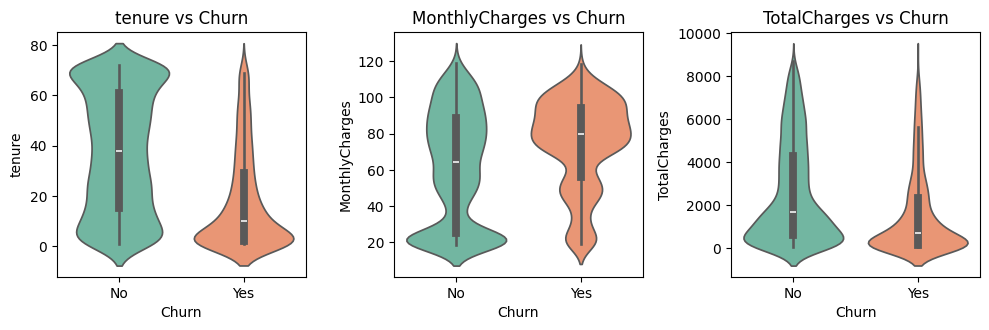

In [19]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(10, 6))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x='Churn', y=col, data=df, palette='Set2', legend=False, hue='Churn')
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

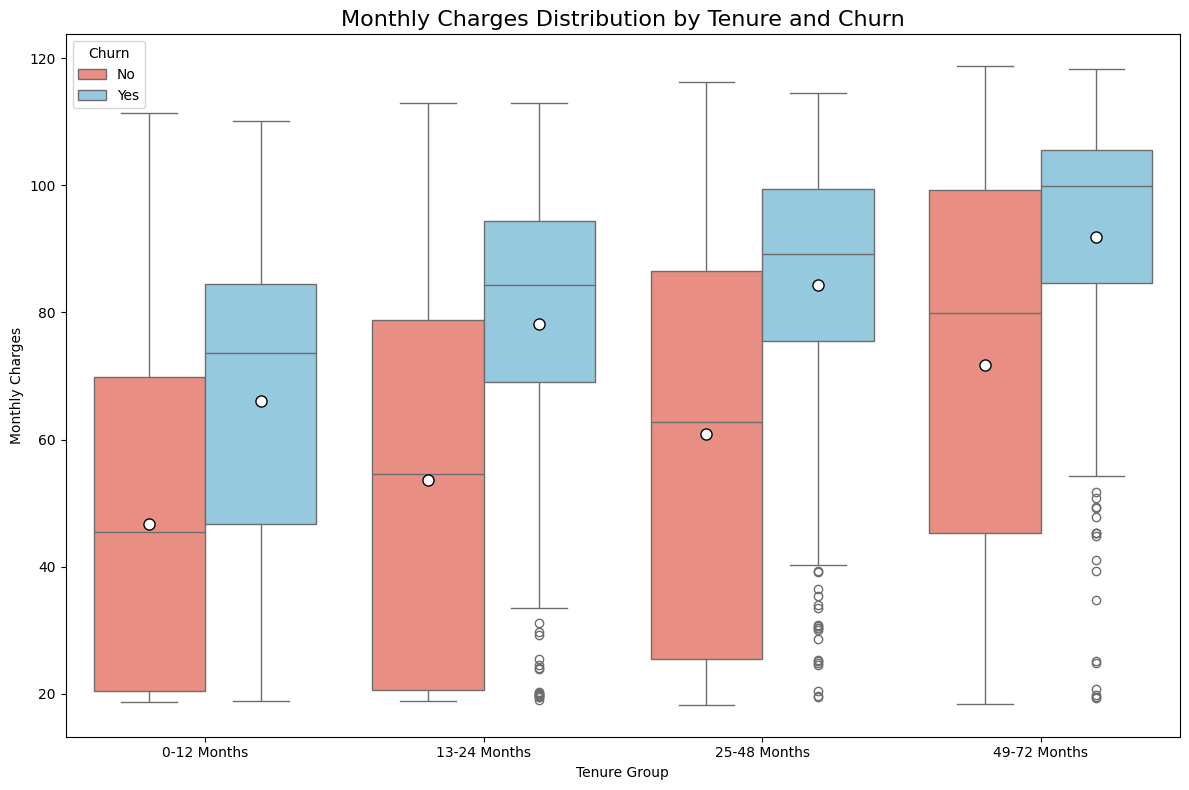

In [20]:
tenure_bins = [0, 12, 24, 48, 73]

tenure_labels = ['0-12 Months', '13-24 Months', '25-48 Months', '49-72 Months']
df['tenure_group'] = pd.cut(df['tenure'], bins = tenure_bins, labels = tenure_labels, right = False)

plt.figure(figsize=(12,8))

sns.boxplot(data=df, x='tenure_group', y = 'MonthlyCharges', hue='Churn', palette=['salmon','skyblue'], showmeans=True,
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"})

plt.title('Monthly Charges Distribution by Tenure and Churn', fontsize=16)
plt.xlabel('Tenure Group')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn', loc='upper left')
plt.tight_layout()
plt.show()

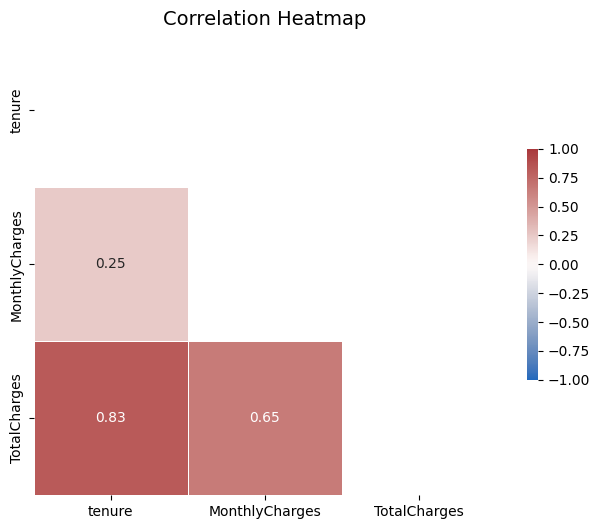

In [21]:
columns_to_correlate = ['tenure', 'MonthlyCharges', 'TotalCharges']

co_mtx = df[columns_to_correlate].corr()

mask = np.triu(np.ones_like(co_mtx, dtype=bool))

plt.figure(figsize=(8, 6)) 
sns.heatmap(
    co_mtx,
    mask=mask,
    cmap='vlag',          
    vmin=-1, vmax=1,
    center=0,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 10},
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)

plt.title('Correlation Heatmap', fontsize=14)
plt.show()